# Aggregazione dati e strutture GroupBy, DataFrameGroupBy, SeriesGroupBy

In questo blog vogliamo mostrare la struttura di un DataFrameGroupBy, ovvero la struttura che si ottiene da un dataframe con operazioni di aggregazione di dati.


#### Riferimenti:

https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html


# Analisi del problema 

Prima di tutto da dati grezzi sotto forma di file CSV, array, dictionari, ecc dobbiamo costruire un dataframe :
 

<img src=" 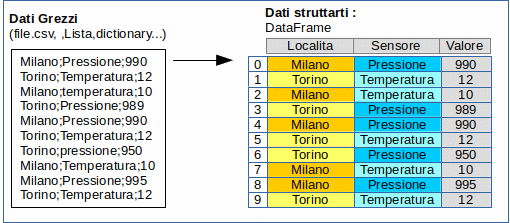"/>

Poi dal dataframe possiamo aggregare i dati per esempio per una colonna :


<img src=" 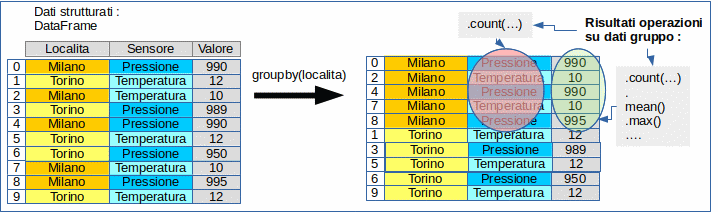"/>

sempre per una colonna :


<src img=" 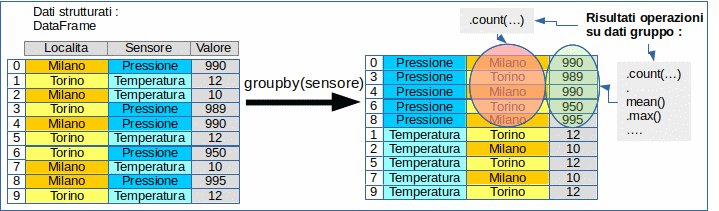"/>

oppure per due colonne :

<img src=" 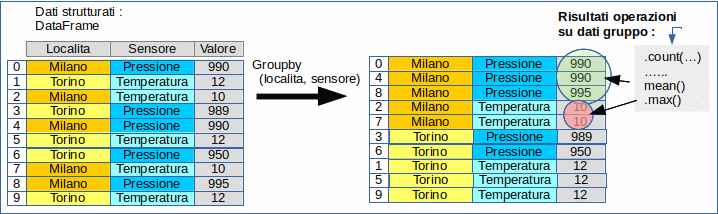"/>

## Scriviamo un po' di codice
#### Importiamo le librerie necessarie

In [117]:
# importa le librerie
%matplotlib inline
import pandas as pd
import numpy as np

### Creazione dataframe
Creiamo un dataframe  partendo da un dictionary, a sua volta creato tramite array.
Il dataframe rappresenta delle misure ottenute da a dei sensori (pressione e temperatura) in diversi periodi, per diverse citta'.


In [118]:
localita =         ['Milano',     'Torino',     'Milano',     'Milano'     ,'Milano'     ,'Milano'     ]     
sensore=           ['Temperatura','Temperatura','Temperatura','Pressione'  ,'Pressione'  ,'Pressione'  ]
valore=            [10          ,12          ,  14          ,  998         ,997          ,999          ]
localita=localita+ ['Torino',     'Torino',     'Milano',     'Milano'     ,'Torino'     ,'Torino'  ]     
sensore=sensore+   ['Temperatura','Temperatura','Temperatura','Pressione'  ,'Pressione'  ,'Pressione'  ]
valore=valore+     [10          ,12          ,  14          ,  998         ,997         ,999          ]

tabella={'localita':localita,'sensore':sensore,'valore':valore}
df=pd.DataFrame(tabella)


# Aggregazione dati
In algebra relazionale una operazione groupby 'e una operazione di aggregazione.
Vengono specificati degi 'attributi' (colonne) di aggregazione, ed una lista di coppie (funzione , attributo),
dove la funzione 'e una delle operazione ammesse , quali sum,avareg, mean, count, e attributo 'e una colonna.

La relazione risultante ha gli attributi(colonne) del raggruppamento, piu' un attributo (colonna) per ciscun elemento nella lista delle funzoni(sum,count,mean,ecc.)

### Group by su UNA colonna

Proviamo a fare un groupby su una colonna , per esempio la colonna località. 
Le elaborazioni vengono effettuate sui dati corrispondenti alla localita'. 

Quindi come count ho il numero totale degli elemnti per ogni località, mentre come media dei valori numerici ho dei valori non attendibili in qunato ho la media delle pressioni e temperature insieme.

Il tipo dati ottenuto `e 'pandas.core.groupby.groupby.DataFrameGroupBy'

In [119]:
gb=df.groupby('localita')
print("Tipo gb :",type(gb))
gb.describe()

Tipo gb : <class 'pandas.core.groupby.groupby.DataFrameGroupBy'>


valore                                                         
          count        mean         std   min   25%    50%    75%    max
localita                                                                
Milano      7.0  575.714286  526.684825  10.0  14.0  997.0  998.0  999.0
Torino      5.0  406.000000  540.420669  10.0  12.0   12.0  997.0  999.0

Calcoliamo medie e conteggi . Se si fanno calcoli numerici su campi non numerici si ha un errore (sensore : campo NON numerico, no si puo calcolare la media : gb.sensore.mean() restituisce errore.

In [120]:
print(gb.sensore)
print(gb.sensore.count())
print(gb.valore.mean())
# sensore : campo NON numerico, no si puo calcolare la media print(gb.sensore.mean())

localita
Milano    7
Torino    5
Name: sensore, dtype: int64
localita
Milano    575.714286
Torino    406.000000
Name: valore, dtype: float64


### groupby su DUE colonne

In [121]:
gb['valore']

Effettuiamo un groupby su due colonne (località e sensore).
Prima di tutto notiamo che i campi vanno passati come array( tra parentesi quadre).
I dati sono aggregati prima per citta e poi per semsore.

In [122]:
gb2=df.groupby(['localita','sensore'])
gb2.describe()

valore                                              \
                      count        mean       std    min     25%    50%   
localita sensore                                                          
Milano   Pressione      4.0  998.000000  0.816497  997.0  997.75  998.0   
         Temperatura    3.0   12.666667  2.309401   10.0   12.00   14.0   
Torino   Pressione      2.0  998.000000  1.414214  997.0  997.50  998.0   
         Temperatura    3.0   11.333333  1.154701   10.0   11.00   12.0   

                                     
                         75%    max  
localita sensore                     
Milano   Pressione    998.25  999.0  
         Temperatura   14.00   14.0  
Torino   Pressione    998.50  999.0  
         Temperatura   12.00   12.0

Possiamo quindi avere dei dati per localita e sensore :

In [123]:
print(gb2.valore.mean())
print(gb2.sensore.count())

localita  sensore    
Milano    Pressione      998.000000
          Temperatura     12.666667
Torino    Pressione      998.000000
          Temperatura     11.333333
Name: valore, dtype: float64
localita  sensore    
Milano    Pressione      4
          Temperatura    3
Torino    Pressione      2
          Temperatura    3
Name: sensore, dtype: int64


## Tipi dati

#### DataFrameGroupBy
L'operazione groupy(...) su un DataFrame restituisce un tipo di dato 'pandas.core.groupby.groupby.DataFrameGroupBy'
####  SeriesGroupBy e Series
Il tipo di dato estraendo una colonna 'e un **SeriesGroupBy** , ed effettuando

operazoni su questa (mean,count,ecc..) si ottiene una ** pandas.core.Series** .

In [124]:
print(type(gb2))
print(type(gb2.valore))
print(type(gb2.valore.mean()))


<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>
<class 'pandas.core.groupby.groupby.SeriesGroupBy'>
<class 'pandas.core.series.Series'>


#####  In sintesi :

<img src=" 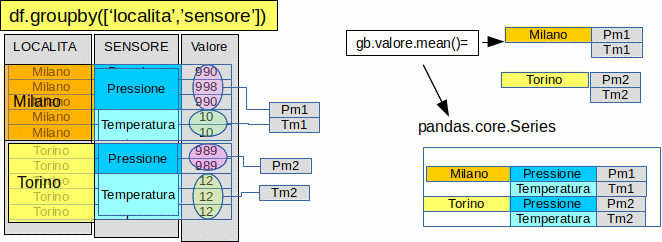"/>

<img src=" 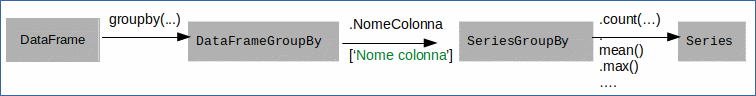"/>

## DataFrameGroupBy
### Rappresenta il dataframe con i dati raggruppati : ogni operazione viene effettuata sul raggruppamento

### Proviamo con l'operazione count()

In [171]:
dfgb=df.groupby(['localita','sensore'])
dfgb.count()

valore
localita sensore            
Milano   Pressione         4
         Temperatura       3
Torino   Pressione         2
         Temperatura       3

Se avessimo fatto l'operazione su tutto il DataFrame avremmo avuto il conteggio totale per ogni colonna

In [172]:
df.count()

localita    12
sensore     12
valore      12
dtype: int64

## SeriesGroupBy
### Rappresenta una colonna

In [173]:
dfgb=df.groupby(['localita','sensore'])
# Otteniamo una serie che rappresenta una colonna
sgb=dfgb.valore
sgb.count()

localita  sensore    
Milano    Pressione      4
          Temperatura    3
Torino    Pressione      2
          Temperatura    3
Name: valore, dtype: int64

In [167]:
print(type(sgb))
print(sgb.indices)
print(type(sgb.indices))

print(sgb.groups)
print(type(sgb.groups))

<class 'pandas.core.groupby.groupby.SeriesGroupBy'>
{('Milano', 'Pressione'): array([3, 4, 5, 9]), ('Milano', 'Temperatura'): array([0, 2, 8]), ('Torino', 'Pressione'): array([10, 11]), ('Torino', 'Temperatura'): array([1, 6, 7])}
<class 'dict'>
{('Milano', 'Pressione'): Int64Index([3, 4, 5, 9], dtype='int64'), ('Milano', 'Temperatura'): Int64Index([0, 2, 8], dtype='int64'), ('Torino', 'Pressione'): Int64Index([10, 11], dtype='int64'), ('Torino', 'Temperatura'): Int64Index([1, 6, 7], dtype='int64')}
<class 'dict'>


Chiamando il metodo **describe()** su un SeriesGroupBy ottengo un dataframe con le operazioni comune svolte sulle righe.
In questo esempio creiamo un dataframe tramite il metodo describe , ed osserviamo che le colonne sono 'count', 'mean' ecc.ecc.

Il dataframe creato ha un indice di tipo **MultiIndex **.

#### Creiamo un dataframe da un SeriesGroupBy : describe()

In [148]:
sgb=gb2.valore
dfsgbd=sgb.describe()
print(dfsgbd.columns)
display(dfsgbd[:3])
dfsgbd.index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')


count        mean       std    min     25%    50%  \
localita sensore                                                          
Milano   Pressione      4.0  998.000000  0.816497  997.0  997.75  998.0   
         Temperatura    3.0   12.666667  2.309401   10.0   12.00   14.0   
Torino   Pressione      2.0  998.000000  1.414214  997.0  997.50  998.0   

                         75%    max  
localita sensore                     
Milano   Pressione    998.25  999.0  
         Temperatura   14.00   14.0  
Torino   Pressione    998.50  999.0

MultiIndex(levels=[['Milano', 'Torino'], ['Pressione', 'Temperatura']],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=['localita', 'sensore'])

#### Creiamo un dataframe da un SeriesGroupBy : apply(pd.DataFrame) 

In [149]:
dfvalmin=gb2.valore.apply(pd.DataFrame)
display(dfvalmin)
print(dfvalmin.columns)

Milano                Torino            
   Pressione Temperatura Pressione Temperatura
0        NaN        10.0       NaN         NaN
1        NaN         NaN       NaN        12.0
2        NaN        14.0       NaN         NaN
3      998.0         NaN       NaN         NaN
4      997.0         NaN       NaN         NaN
5      999.0         NaN       NaN         NaN
6        NaN         NaN       NaN        10.0
7        NaN         NaN       NaN        12.0
8        NaN        14.0       NaN         NaN
9      998.0         NaN       NaN         NaN
10       NaN         NaN     997.0         NaN
11       NaN         NaN     999.0         NaN

MultiIndex(levels=[['Milano', 'Torino'], ['Pressione', 'Temperatura']],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]],
           sortorder=0)


## UNSTACK
Con l'opzione unstack posso spostare una colonna aggregata sulla intestazione. Questa operazione mi trasforma la Series in dataframe, e posso in tale maniera effettuare operazoni specifiche del dataframe .
Quindi nel codice sotto eseguimo questa trasformazione :

da groupby --> valore.mean()--> Serie ---> unstack(..) --> dataframe :

In [141]:
# Porto la colonna 0 (localita) sull 'header 
df0=gb2.valore.mean().unstack(0)
# Porto la colonna 1 (sensore) sull 'header 
df1=gb2.valore.mean().unstack(1)
print("unstack(0) :Porto la colonna 0 (localita) sull 'header\n")
display(df0)
print("Colonne : ",df0.columns)
print("\nunstack(1) :Porto la colonna 1 (sensore) sull 'header\n")
display(df1)
print("Columns : ",df1.columns)

unstack(0) :Porto la colonna 0 (localita) sull 'header



localita,Milano,Torino
sensore,,
Pressione,998.000000,998.000000
Temperatura,12.666667,11.333333


Colonne :  Index(['Milano', 'Torino'], dtype='object', name='localita')

unstack(1) :Porto la colonna 1 (sensore) sull 'header



sensore,Pressione,Temperatura
localita,,
Milano,998.0,12.666667
Torino,998.0,11.333333


Columns :  Index(['Pressione', 'Temperatura'], dtype='object', name='sensore')


In [130]:
gb2.valore.mean().unstack('sensore')

sensore,Pressione,Temperatura
localita,,
Milano,998.0,12.666667
Torino,998.0,11.333333


<img src=" 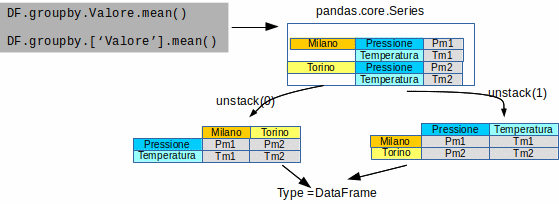" />

<img src=" 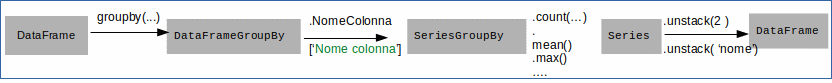"/>

Possiamo fare operazioni sui dati trasformati in dataframe :

In [140]:
print(df0.iloc[0][1])
print(df1.iloc[0][1])

998.0
12.666666666666666


### USIAMO UNSTACK PER AVERE UN DATAFRAME MULTI INDEX E LO FILTRIAMO

In [143]:
gb2=df.groupby(['localita','sensore'])
dfvalmean=gb2.valore.mean().unstack('sensore')
display(dfvalmean)

sensore,Pressione,Temperatura
localita,,
Milano,998.0,12.666667
Torino,998.0,11.333333


### Abbiamo un dataframe multi index 

In [144]:
dfvalmean.index

Index(['Milano', 'Torino'], dtype='object', name='localita')

** per filtrarlo dobbiamo usare query() **

Inoltre poiche e una stringa usiamo una variabile esterna richiamata tramite la eta @.

In [90]:
x='Milano'
dff.query('localita==@x')

,sensore,Pressione,Temperatura
data,localita,,
10/01/2019,Milano,989,4
11/01/2019,Milano,982,0
12/01/2019,Milano,985,0


# Iterazioni su DataFrameGroupBy

## DataFrameGroupBy ottenuta con una colonna
### Iterazione ad Un parametro (for x in gb)
Ogni iterazione restitusce come elemento una TUPLA (variablie gruppo nell'esempio )
Il primo elemento della tupla restituisce il nome del gruppo (gruppo[0])
Il secondo elemento della tupla (gruppo[1]) restituisce un dataframe che rappresenta i dati .

In [145]:
# i : per eseguire il ciclo solo sul primo elemento
i=0
for gruppo in gb:
    i=i+1
    print(gruppo)
    print("Type gruppo : ",type(gruppo))
    print("Type gruppo[0] : ",type(gruppo[0]))
    print("Type gruppo[1] : ",type(gruppo[1]))
    #print(type(x))
    #print("X[0] =",x[0],"X[1]=",x[1],type(x[1]))
    if i > 0:
        break

('Milano',   localita      sensore  valore
0   Milano  Temperatura      10
2   Milano  Temperatura      14
3   Milano    Pressione     998
4   Milano    Pressione     997
5   Milano    Pressione     999
8   Milano  Temperatura      14
9   Milano    Pressione     998)
Type gruppo :  <class 'tuple'>
Type gruppo[0] :  <class 'str'>
Type gruppo[1] :  <class 'pandas.core.frame.DataFrame'>


### Iterazione a Due parametri (for x,y in gb)
Con due parametri viene già scomposta la tupla mostrata in precedenza.

Sul  primo elemento viene caricato ad agni ciclo  il nome del gruppo come stringa (il campo aggregato);
In questo esempio il nome della citta.

Sul secondo elemento (Y) vengono caricati i  dati sotto forma di dataframe con il campo aggregato filtrato .

In [136]:
# i : per eseguire il ciclo solo sul primo elemento
i=0
for nomegruppo,dfgruppo in gb:
    i=i+1
    print("nomegruppo : ",nomegruppo)
    print("Tipo nome gruppo :",type(nomegruppo))
    print("\ndfgruppo : ")
    display(dfgruppo)
    print("Colonne :",dfgruppo.columns)
    print("Tipo dfgruppo :",type(dfgruppo))
    if i>0 :
        break

nomegruppo :  Milano
Tipo nome gruppo : <class 'str'>

dfgruppo : 


,localita,sensore,valore
0,Milano,Temperatura,10
2,Milano,Temperatura,14
3,Milano,Pressione,998
4,Milano,Pressione,997
5,Milano,Pressione,999
8,Milano,Temperatura,14
9,Milano,Pressione,998


Colonne : Index(['localita', 'sensore', 'valore'], dtype='object')
Tipo dfgruppo : <class 'pandas.core.frame.DataFrame'>


## DataFrameGroupBy creato da piu' aggregazioni
Utilizzando il DataFrameGroupBy ottenuto aggregando più colonne , come mome del gruppo, nella iterazione, si ottiene una tupla con i nomi dei campi, mentre nella seconda variabile della iterazione si ottiene sempre un dataframe :

In [138]:
# i : per eseguire il ciclo solo sul primo elemento
i=0
for nomegruppo,dfgruppo in gb2:
    i=i+1
    print("nomegruppo : ",nomegruppo)
    print("Tipo nome gruppo :",type(nomegruppo))
    print("\ndfgruppo : ")
    display(dfgruppo)
    print("Colonne :",dfgruppo.columns)    
    print("Tipo dfgruppo :",type(dfgruppo))
    if i>0 :
        break

nomegruppo :  ('Milano', 'Pressione')
Tipo nome gruppo : <class 'tuple'>

dfgruppo : 


,localita,sensore,valore
3,Milano,Pressione,998
4,Milano,Pressione,997
5,Milano,Pressione,999
9,Milano,Pressione,998


Colonne : Index(['localita', 'sensore', 'valore'], dtype='object')
Tipo dfgruppo : <class 'pandas.core.frame.DataFrame'>


# Operazioni varie per estrarre dati da un DataFrameGroupBy

In [ ]:
Otteniamo i nomi dei gruppi, sotto forma di dict_key

In [115]:
dk=gb2.groups.keys()
print(dk)
lstdk=list(dk)
lstdk[2]


dict_keys([('Milano', 'Pressione'), ('Milano', 'Temperatura'), ('Torino', 'Pressione'), ('Torino', 'Temperatura')])


('Torino', 'Pressione')

Otteniamo gli indici dei dati di ogni gruppo ( tipo dict_items) e cerchiamo i valori nel dataframe :

In [141]:
ditm=gb2.groups.items()
print("gb2.groups.items() (tipo dict_item): \n",ditm)
items=list(ditm)
gr=0
print("\n items=list(ditm), elenco dei gruppi. ")
print("\n items[{}] (tupla) , rappresenta il gruppo [{}]:  \n".format(gr,gr),items[0])

print("\n Nome   del gruppo {} --> items[{}][0] : \n".format(gr,gr),items[gr][0])
print("\n Indici del gruppo {} --> items[{}][1] : \n".format(gr,gr),items[gr][1])
print("\nOttengo le righe dal dataframe in base agli indici del gruppo :")
for i in items[0][1]:
    print("\n ----- Riga del dataframe {}".format(i))
    print(df.iloc[i])

gb2.groups.items() (tipo dict_item): 
 dict_items([(('Milano', 'Pressione'), Int64Index([3, 4, 5, 9], dtype='int64')), (('Milano', 'Temperatura'), Int64Index([0, 2, 8], dtype='int64')), (('Torino', 'Pressione'), Int64Index([10, 11], dtype='int64')), (('Torino', 'Temperatura'), Int64Index([1, 6, 7], dtype='int64'))])

 items=list(ditm), elenco dei gruppi. 

 items[0] (tupla) , rappresenta il gruppo [0]:  
 (('Milano', 'Pressione'), Int64Index([3, 4, 5, 9], dtype='int64'))

 Nome   del gruppo 0 --> items[0][0] : 
 ('Milano', 'Pressione')

 Indici del gruppo 0 --> items[0][1] : 
 Int64Index([3, 4, 5, 9], dtype='int64')

Ottengo le righe dal dataframe in base agli indici del gruppo :

 ----- Riga del dataframe 3
localita       Milano
sensore     Pressione
valore            998
Name: 3, dtype: object

 ----- Riga del dataframe 4
localita       Milano
sensore     Pressione
valore            997
Name: 4, dtype: object

 ----- Riga del dataframe 5
localita       Milano
sensore     Pressione
va

#### Altro modo per ottenere l'elenco dei gruppi

In [100]:
list(gb2.groups)

[('Milano', 'Pressione'),
 ('Milano', 'Temperatura'),
 ('Torino', 'Pressione'),
 ('Torino', 'Temperatura')]

#### Otteniamo un dataframe in base al gruppo che ci interessa :

In [108]:
type(gb2.get_group(('Milano','Pressione')))
gb2.get_group(('Milano','Pressione'))

,localita,sensore,valore
3,Milano,Pressione,998
4,Milano,Pressione,997
5,Milano,Pressione,999
9,Milano,Pressione,998


In [134]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:800px !important; }</style>"))